# Diabetes Prediction Model

## Importing the dependencies

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Loading the data

In [226]:
diabetes_data = pd.read_csv('diabetes.csv')

## Data Exploration

In [227]:
diabetes_data.shape

(768, 9)

In [228]:
diabetes_data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
202,0,108,68,20,0,27.3,0.787,32,0
578,10,133,68,0,0,27.0,0.245,36,0
83,0,101,65,28,0,24.6,0.237,22,0
164,0,131,88,0,0,31.6,0.743,32,1
70,2,100,66,20,90,32.9,0.867,28,1


In [229]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [230]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [231]:
# Target varible -> 'Outcome' feature
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [232]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


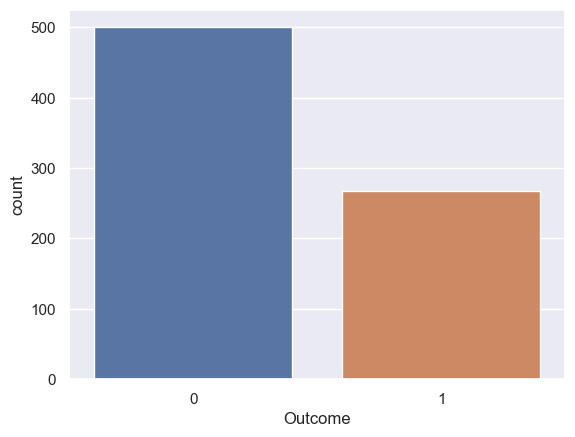

In [233]:
sns.set()
sns.countplot(x='Outcome', data=diabetes_data)
plt.show()

In [234]:
diabetes_data['Outcome'].shape[0]

768

In [235]:
(diabetes_data['Outcome'] == 1).sum() / diabetes_data['Outcome'].shape[0]

0.3489583333333333

There is some class imbalance, I will build a model without the class imbalance and see if it performs better (it probably will!)

In [236]:
# 'Pregnancies' feature 
diabetes_data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

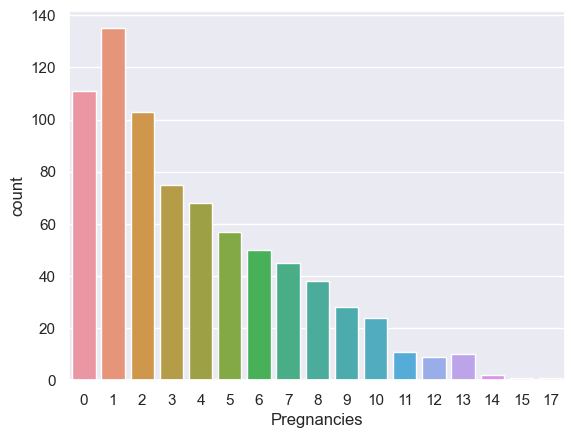

In [237]:
sns.countplot(x='Pregnancies', data=diabetes_data)
plt.show()

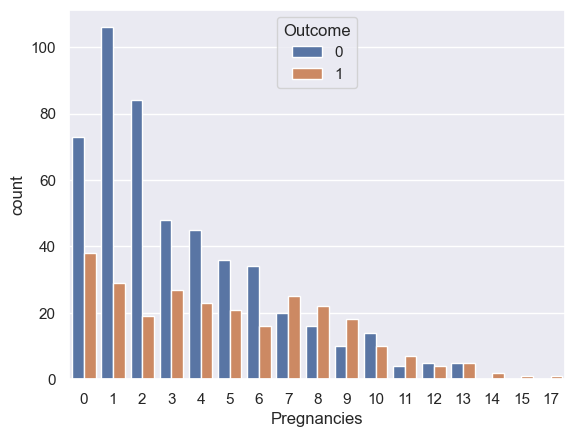

In [238]:
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes_data)
plt.show()

In [239]:
# 'Glucose' feature
diabetes_data['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


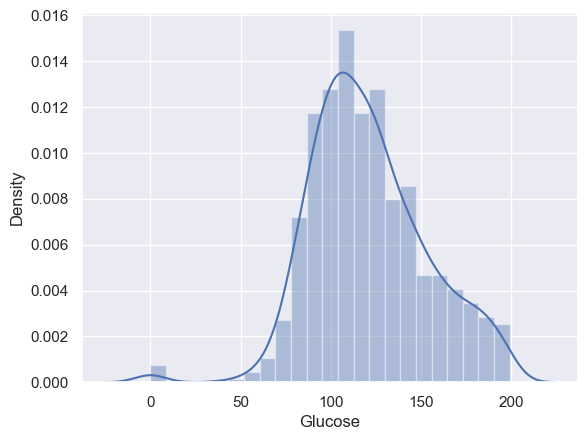

In [240]:
sns.distplot(diabetes_data['Glucose'])
plt.show()

In [241]:
# 'BloodPressure' feature
diabetes_data['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


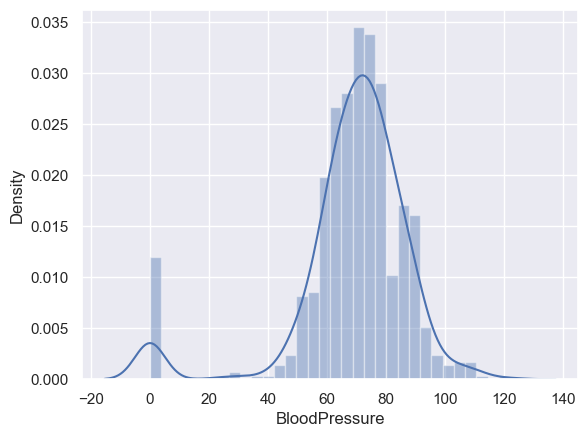

In [242]:
sns.distplot(diabetes_data['BloodPressure'])
plt.show()

In [243]:
# 'SkinThickness' feature
diabetes_data['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


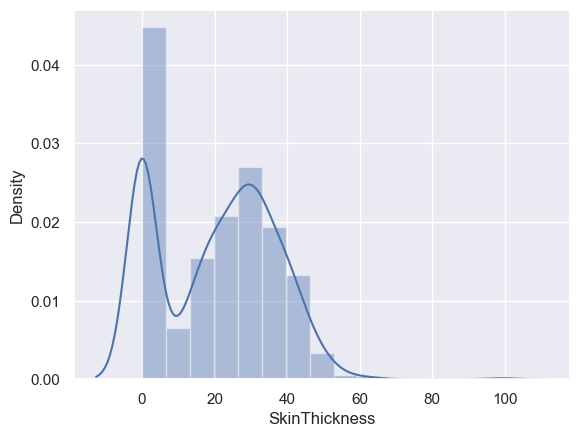

In [244]:
sns.distplot(diabetes_data['SkinThickness'])
plt.show()

In [245]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [246]:
# 'Insulin' feature
diabetes_data['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


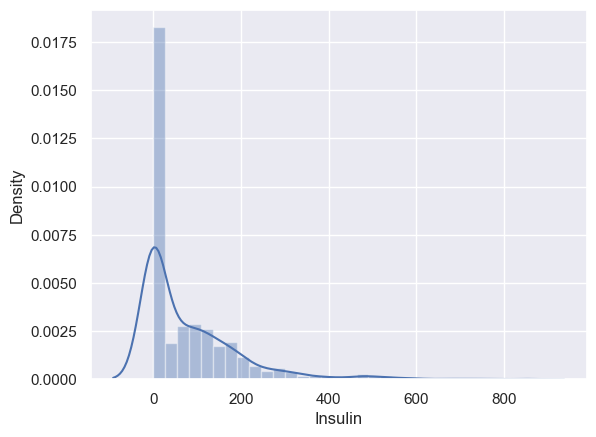

In [247]:
sns.distplot(diabetes_data['Insulin'])
plt.show()

In [248]:
# 'BMI' feature
diabetes_data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


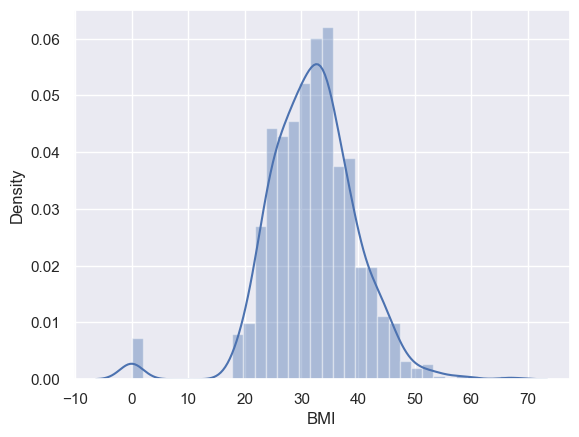

In [249]:
sns.distplot(diabetes_data['BMI'])
plt.show()

In [250]:
# 'DiabetesPedigreeFunction' feature
diabetes_data['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


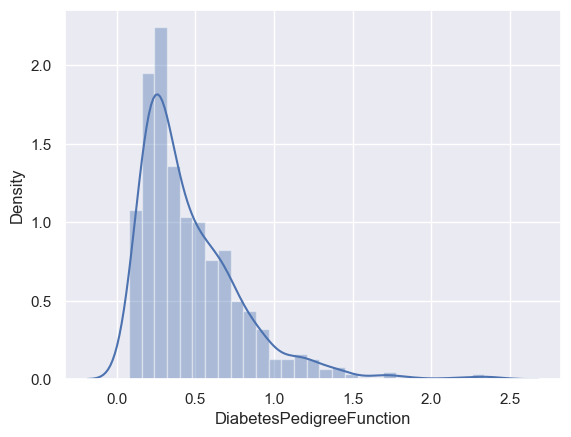

In [251]:
sns.distplot(diabetes_data['DiabetesPedigreeFunction'])
plt.show()

In [252]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [253]:
# 'Age' feature
diabetes_data['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


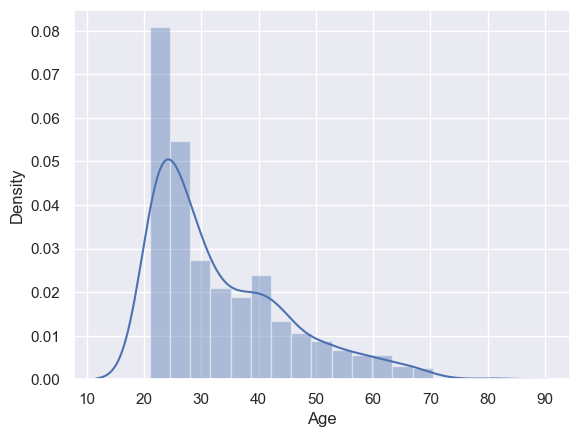

In [254]:
sns.distplot(diabetes_data['Age'])
plt.show()

## Splitting the features and the label

In [255]:
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

## Splitting the data into training set and test set

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

## Feature scaling the data

In [257]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the models and comparing the accuracy scores 

In [258]:
classifiers = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(max_iter=2000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'solver': ['liblinear', 'lbfgs']
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Decision Tree',
        'classifier': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Support Vector Machine',
        'classifier': SVC(max_iter=2000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Random Forest',
        'classifier': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Gaussian Naive Bayes',
        'classifier': GaussianNB(),
        'params': {},
        'train_data': 'X_train'
    },
    {
        'name': 'XGB Classifer',
        'classifier': XGBClassifier(),
        'params': {},
        'train_data': 'X_train'
    },
    {
        'name': 'CatBoost Classifier',
        'classifier': CatBoostClassifier(),
        'params': {},
        'train_data': 'X_train'
    }
]


In [259]:
results_df = pd.DataFrame(columns=['Classifier', 'Best Parameters', 'Accuracy'])

In [260]:
for classifier in classifiers:
    if classifier['train_data'] == 'X_train':
        X_train_data = X_train
    elif classifier['train_data'] == 'X_train_scaled':
        X_train_data = X_train_scaled
    else:
        raise ValueError("Invalid train_data value. Must be 'X_train' or 'X_train_scaled'.")
    
    grid_search = GridSearchCV(classifier['classifier'], classifier['params'], cv=5)
    grid_search.fit(X_train_data, y_train)
    best_classifier = grid_search.best_estimator_
    if classifier['train_data'] == 'X_train':
        y_pred = best_classifier.predict(X_test)
    elif classifier['train_data'] == 'X_train_scaled':
        X_test_scaled = scaler.transform(X_test)
        y_pred = best_classifier.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the results to the DataFrame
    results_df = results_df.append({
        'Classifier': classifier['name'],
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy
    }, ignore_index=True)


C:\Users\anupa\AppData\Local\Temp\ipykernel_19200\4204547685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_19200\4204547685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: Conver

Learning rate set to 0.007604
0:	learn: 0.6889791	total: 141ms	remaining: 2m 20s
1:	learn: 0.6850391	total: 143ms	remaining: 1m 11s
2:	learn: 0.6814500	total: 145ms	remaining: 48.1s
3:	learn: 0.6770421	total: 147ms	remaining: 36.5s
4:	learn: 0.6731728	total: 149ms	remaining: 29.6s
5:	learn: 0.6688274	total: 151ms	remaining: 25s
6:	learn: 0.6647262	total: 154ms	remaining: 21.8s
7:	learn: 0.6610589	total: 156ms	remaining: 19.4s
8:	learn: 0.6570669	total: 159ms	remaining: 17.5s
9:	learn: 0.6529605	total: 161ms	remaining: 16s
10:	learn: 0.6492239	total: 164ms	remaining: 14.7s
11:	learn: 0.6459781	total: 167ms	remaining: 13.7s
12:	learn: 0.6429196	total: 169ms	remaining: 12.8s
13:	learn: 0.6401341	total: 171ms	remaining: 12s
14:	learn: 0.6354971	total: 173ms	remaining: 11.4s
15:	learn: 0.6314995	total: 175ms	remaining: 10.8s
16:	learn: 0.6288463	total: 178ms	remaining: 10.3s
17:	learn: 0.6261215	total: 180ms	remaining: 9.8s
18:	learn: 0.6226232	total: 182ms	remaining: 9.39s
19:	learn: 0.619

195:	learn: 0.3845259	total: 578ms	remaining: 2.37s
196:	learn: 0.3837580	total: 580ms	remaining: 2.37s
197:	learn: 0.3834243	total: 583ms	remaining: 2.36s
198:	learn: 0.3829921	total: 585ms	remaining: 2.35s
199:	learn: 0.3824615	total: 587ms	remaining: 2.35s
200:	learn: 0.3820786	total: 590ms	remaining: 2.34s
201:	learn: 0.3814369	total: 592ms	remaining: 2.34s
202:	learn: 0.3810608	total: 595ms	remaining: 2.33s
203:	learn: 0.3802958	total: 597ms	remaining: 2.33s
204:	learn: 0.3793858	total: 600ms	remaining: 2.33s
205:	learn: 0.3787697	total: 602ms	remaining: 2.32s
206:	learn: 0.3779557	total: 604ms	remaining: 2.31s
207:	learn: 0.3776622	total: 607ms	remaining: 2.31s
208:	learn: 0.3769786	total: 609ms	remaining: 2.31s
209:	learn: 0.3763314	total: 611ms	remaining: 2.3s
210:	learn: 0.3759972	total: 614ms	remaining: 2.29s
211:	learn: 0.3754941	total: 616ms	remaining: 2.29s
212:	learn: 0.3748832	total: 618ms	remaining: 2.28s
213:	learn: 0.3739443	total: 620ms	remaining: 2.28s
214:	learn: 0

371:	learn: 0.3135319	total: 964ms	remaining: 1.63s
372:	learn: 0.3131439	total: 967ms	remaining: 1.63s
373:	learn: 0.3127465	total: 969ms	remaining: 1.62s
374:	learn: 0.3123800	total: 972ms	remaining: 1.62s
375:	learn: 0.3119545	total: 974ms	remaining: 1.62s
376:	learn: 0.3117321	total: 976ms	remaining: 1.61s
377:	learn: 0.3115289	total: 978ms	remaining: 1.61s
378:	learn: 0.3111398	total: 980ms	remaining: 1.61s
379:	learn: 0.3107282	total: 983ms	remaining: 1.6s
380:	learn: 0.3103662	total: 985ms	remaining: 1.6s
381:	learn: 0.3100880	total: 987ms	remaining: 1.6s
382:	learn: 0.3098371	total: 989ms	remaining: 1.59s
383:	learn: 0.3094348	total: 991ms	remaining: 1.59s
384:	learn: 0.3092439	total: 993ms	remaining: 1.59s
385:	learn: 0.3087240	total: 995ms	remaining: 1.58s
386:	learn: 0.3082928	total: 997ms	remaining: 1.58s
387:	learn: 0.3080570	total: 999ms	remaining: 1.57s
388:	learn: 0.3077512	total: 1s	remaining: 1.57s
389:	learn: 0.3076338	total: 1s	remaining: 1.57s
390:	learn: 0.3074912

552:	learn: 0.2639464	total: 1.35s	remaining: 1.09s
553:	learn: 0.2635198	total: 1.35s	remaining: 1.09s
554:	learn: 0.2633329	total: 1.35s	remaining: 1.08s
555:	learn: 0.2630706	total: 1.35s	remaining: 1.08s
556:	learn: 0.2628974	total: 1.36s	remaining: 1.08s
557:	learn: 0.2627973	total: 1.36s	remaining: 1.08s
558:	learn: 0.2625786	total: 1.36s	remaining: 1.07s
559:	learn: 0.2621605	total: 1.36s	remaining: 1.07s
560:	learn: 0.2619963	total: 1.36s	remaining: 1.07s
561:	learn: 0.2618027	total: 1.37s	remaining: 1.06s
562:	learn: 0.2615883	total: 1.37s	remaining: 1.06s
563:	learn: 0.2614100	total: 1.37s	remaining: 1.06s
564:	learn: 0.2609337	total: 1.37s	remaining: 1.06s
565:	learn: 0.2606894	total: 1.38s	remaining: 1.05s
566:	learn: 0.2605036	total: 1.38s	remaining: 1.05s
567:	learn: 0.2603357	total: 1.38s	remaining: 1.05s
568:	learn: 0.2600824	total: 1.38s	remaining: 1.05s
569:	learn: 0.2597847	total: 1.39s	remaining: 1.05s
570:	learn: 0.2595727	total: 1.39s	remaining: 1.04s
571:	learn: 

730:	learn: 0.2245268	total: 1.73s	remaining: 637ms
731:	learn: 0.2243379	total: 1.73s	remaining: 635ms
732:	learn: 0.2240460	total: 1.74s	remaining: 633ms
733:	learn: 0.2239205	total: 1.74s	remaining: 630ms
734:	learn: 0.2235637	total: 1.74s	remaining: 628ms
735:	learn: 0.2233534	total: 1.74s	remaining: 625ms
736:	learn: 0.2232124	total: 1.75s	remaining: 623ms
737:	learn: 0.2230379	total: 1.75s	remaining: 620ms
738:	learn: 0.2227840	total: 1.75s	remaining: 618ms
739:	learn: 0.2225392	total: 1.75s	remaining: 615ms
740:	learn: 0.2222982	total: 1.75s	remaining: 613ms
741:	learn: 0.2220645	total: 1.75s	remaining: 610ms
742:	learn: 0.2219298	total: 1.76s	remaining: 608ms
743:	learn: 0.2217960	total: 1.76s	remaining: 605ms
744:	learn: 0.2215898	total: 1.76s	remaining: 603ms
745:	learn: 0.2214306	total: 1.76s	remaining: 601ms
746:	learn: 0.2212559	total: 1.77s	remaining: 599ms
747:	learn: 0.2209797	total: 1.77s	remaining: 596ms
748:	learn: 0.2207215	total: 1.77s	remaining: 594ms
749:	learn: 

910:	learn: 0.1905681	total: 2.11s	remaining: 207ms
911:	learn: 0.1902988	total: 2.12s	remaining: 204ms
912:	learn: 0.1901035	total: 2.12s	remaining: 202ms
913:	learn: 0.1899782	total: 2.12s	remaining: 200ms
914:	learn: 0.1897210	total: 2.12s	remaining: 197ms
915:	learn: 0.1895555	total: 2.13s	remaining: 195ms
916:	learn: 0.1893664	total: 2.13s	remaining: 193ms
917:	learn: 0.1892683	total: 2.13s	remaining: 190ms
918:	learn: 0.1890866	total: 2.13s	remaining: 188ms
919:	learn: 0.1890255	total: 2.13s	remaining: 186ms
920:	learn: 0.1887799	total: 2.14s	remaining: 183ms
921:	learn: 0.1885920	total: 2.14s	remaining: 181ms
922:	learn: 0.1884513	total: 2.14s	remaining: 179ms
923:	learn: 0.1883451	total: 2.14s	remaining: 176ms
924:	learn: 0.1882066	total: 2.15s	remaining: 174ms
925:	learn: 0.1879357	total: 2.15s	remaining: 172ms
926:	learn: 0.1877928	total: 2.15s	remaining: 169ms
927:	learn: 0.1875878	total: 2.15s	remaining: 167ms
928:	learn: 0.1873965	total: 2.15s	remaining: 165ms
929:	learn: 

145:	learn: 0.4139516	total: 311ms	remaining: 1.82s
146:	learn: 0.4130547	total: 314ms	remaining: 1.82s
147:	learn: 0.4117991	total: 316ms	remaining: 1.82s
148:	learn: 0.4111628	total: 318ms	remaining: 1.82s
149:	learn: 0.4105081	total: 320ms	remaining: 1.81s
150:	learn: 0.4090909	total: 323ms	remaining: 1.81s
151:	learn: 0.4084251	total: 325ms	remaining: 1.81s
152:	learn: 0.4075851	total: 327ms	remaining: 1.81s
153:	learn: 0.4071030	total: 329ms	remaining: 1.81s
154:	learn: 0.4065596	total: 331ms	remaining: 1.8s
155:	learn: 0.4059844	total: 333ms	remaining: 1.8s
156:	learn: 0.4053318	total: 336ms	remaining: 1.8s
157:	learn: 0.4048775	total: 338ms	remaining: 1.8s
158:	learn: 0.4037702	total: 340ms	remaining: 1.8s
159:	learn: 0.4029208	total: 342ms	remaining: 1.8s
160:	learn: 0.4022311	total: 345ms	remaining: 1.8s
161:	learn: 0.4016021	total: 347ms	remaining: 1.79s
162:	learn: 0.4010357	total: 348ms	remaining: 1.79s
163:	learn: 0.4002899	total: 351ms	remaining: 1.79s
164:	learn: 0.39940

321:	learn: 0.3173999	total: 689ms	remaining: 1.45s
322:	learn: 0.3170330	total: 692ms	remaining: 1.45s
323:	learn: 0.3167677	total: 694ms	remaining: 1.45s
324:	learn: 0.3163954	total: 696ms	remaining: 1.45s
325:	learn: 0.3162285	total: 698ms	remaining: 1.44s
326:	learn: 0.3158270	total: 700ms	remaining: 1.44s
327:	learn: 0.3156403	total: 703ms	remaining: 1.44s
328:	learn: 0.3151929	total: 705ms	remaining: 1.44s
329:	learn: 0.3149483	total: 707ms	remaining: 1.44s
330:	learn: 0.3145619	total: 710ms	remaining: 1.43s
331:	learn: 0.3141307	total: 712ms	remaining: 1.43s
332:	learn: 0.3137132	total: 715ms	remaining: 1.43s
333:	learn: 0.3132859	total: 717ms	remaining: 1.43s
334:	learn: 0.3128848	total: 719ms	remaining: 1.43s
335:	learn: 0.3127355	total: 721ms	remaining: 1.42s
336:	learn: 0.3122641	total: 723ms	remaining: 1.42s
337:	learn: 0.3119470	total: 725ms	remaining: 1.42s
338:	learn: 0.3114146	total: 728ms	remaining: 1.42s
339:	learn: 0.3111363	total: 730ms	remaining: 1.42s
340:	learn: 

499:	learn: 0.2676309	total: 1.07s	remaining: 1.07s
500:	learn: 0.2672822	total: 1.07s	remaining: 1.06s
501:	learn: 0.2671558	total: 1.07s	remaining: 1.06s
502:	learn: 0.2669155	total: 1.07s	remaining: 1.06s
503:	learn: 0.2667106	total: 1.07s	remaining: 1.06s
504:	learn: 0.2665285	total: 1.08s	remaining: 1.06s
505:	learn: 0.2661855	total: 1.08s	remaining: 1.05s
506:	learn: 0.2657942	total: 1.08s	remaining: 1.05s
507:	learn: 0.2654971	total: 1.08s	remaining: 1.05s
508:	learn: 0.2653496	total: 1.09s	remaining: 1.05s
509:	learn: 0.2652370	total: 1.09s	remaining: 1.05s
510:	learn: 0.2650354	total: 1.09s	remaining: 1.04s
511:	learn: 0.2648848	total: 1.09s	remaining: 1.04s
512:	learn: 0.2644545	total: 1.1s	remaining: 1.04s
513:	learn: 0.2642602	total: 1.1s	remaining: 1.04s
514:	learn: 0.2640169	total: 1.1s	remaining: 1.04s
515:	learn: 0.2638420	total: 1.1s	remaining: 1.03s
516:	learn: 0.2635280	total: 1.11s	remaining: 1.03s
517:	learn: 0.2633699	total: 1.11s	remaining: 1.03s
518:	learn: 0.26

672:	learn: 0.2306725	total: 1.46s	remaining: 710ms
673:	learn: 0.2306215	total: 1.46s	remaining: 708ms
674:	learn: 0.2304262	total: 1.47s	remaining: 706ms
675:	learn: 0.2302208	total: 1.47s	remaining: 704ms
676:	learn: 0.2300934	total: 1.47s	remaining: 702ms
677:	learn: 0.2297886	total: 1.47s	remaining: 700ms
678:	learn: 0.2295916	total: 1.48s	remaining: 698ms
679:	learn: 0.2293624	total: 1.48s	remaining: 696ms
680:	learn: 0.2292339	total: 1.48s	remaining: 694ms
681:	learn: 0.2291054	total: 1.48s	remaining: 692ms
682:	learn: 0.2289276	total: 1.49s	remaining: 690ms
683:	learn: 0.2288967	total: 1.49s	remaining: 687ms
684:	learn: 0.2286766	total: 1.49s	remaining: 685ms
685:	learn: 0.2285068	total: 1.49s	remaining: 683ms
686:	learn: 0.2283717	total: 1.5s	remaining: 681ms
687:	learn: 0.2282576	total: 1.5s	remaining: 679ms
688:	learn: 0.2281307	total: 1.5s	remaining: 677ms
689:	learn: 0.2278572	total: 1.5s	remaining: 674ms
690:	learn: 0.2276212	total: 1.5s	remaining: 672ms
691:	learn: 0.227

849:	learn: 0.1983621	total: 1.84s	remaining: 325ms
850:	learn: 0.1982008	total: 1.85s	remaining: 323ms
851:	learn: 0.1981308	total: 1.85s	remaining: 321ms
852:	learn: 0.1979002	total: 1.85s	remaining: 319ms
853:	learn: 0.1977254	total: 1.85s	remaining: 317ms
854:	learn: 0.1975400	total: 1.85s	remaining: 315ms
855:	learn: 0.1974812	total: 1.86s	remaining: 312ms
856:	learn: 0.1973299	total: 1.86s	remaining: 310ms
857:	learn: 0.1971142	total: 1.86s	remaining: 308ms
858:	learn: 0.1970102	total: 1.86s	remaining: 306ms
859:	learn: 0.1967565	total: 1.86s	remaining: 304ms
860:	learn: 0.1966304	total: 1.87s	remaining: 302ms
861:	learn: 0.1965517	total: 1.87s	remaining: 300ms
862:	learn: 0.1964789	total: 1.87s	remaining: 297ms
863:	learn: 0.1962947	total: 1.88s	remaining: 295ms
864:	learn: 0.1961067	total: 1.88s	remaining: 293ms
865:	learn: 0.1960079	total: 1.88s	remaining: 291ms
866:	learn: 0.1957890	total: 1.88s	remaining: 289ms
867:	learn: 0.1956651	total: 1.88s	remaining: 287ms
868:	learn: 

88:	learn: 0.4880180	total: 195ms	remaining: 2s
89:	learn: 0.4866082	total: 198ms	remaining: 2s
90:	learn: 0.4850785	total: 200ms	remaining: 2s
91:	learn: 0.4835510	total: 203ms	remaining: 2s
92:	learn: 0.4817837	total: 205ms	remaining: 2s
93:	learn: 0.4805937	total: 207ms	remaining: 2s
94:	learn: 0.4795232	total: 209ms	remaining: 2s
95:	learn: 0.4784754	total: 212ms	remaining: 2s
96:	learn: 0.4770924	total: 214ms	remaining: 2s
97:	learn: 0.4756811	total: 217ms	remaining: 2s
98:	learn: 0.4743769	total: 219ms	remaining: 1.99s
99:	learn: 0.4733151	total: 221ms	remaining: 1.99s
100:	learn: 0.4721658	total: 223ms	remaining: 1.98s
101:	learn: 0.4711609	total: 225ms	remaining: 1.98s
102:	learn: 0.4696697	total: 227ms	remaining: 1.97s
103:	learn: 0.4683710	total: 229ms	remaining: 1.97s
104:	learn: 0.4671374	total: 231ms	remaining: 1.97s
105:	learn: 0.4658462	total: 233ms	remaining: 1.97s
106:	learn: 0.4649414	total: 235ms	remaining: 1.96s
107:	learn: 0.4635360	total: 237ms	remaining: 1.96s
10

269:	learn: 0.3607114	total: 575ms	remaining: 1.55s
270:	learn: 0.3603326	total: 577ms	remaining: 1.55s
271:	learn: 0.3598951	total: 580ms	remaining: 1.55s
272:	learn: 0.3594664	total: 582ms	remaining: 1.55s
273:	learn: 0.3589750	total: 584ms	remaining: 1.55s
274:	learn: 0.3585879	total: 586ms	remaining: 1.54s
275:	learn: 0.3582816	total: 588ms	remaining: 1.54s
276:	learn: 0.3579884	total: 590ms	remaining: 1.54s
277:	learn: 0.3577111	total: 592ms	remaining: 1.54s
278:	learn: 0.3572731	total: 594ms	remaining: 1.53s
279:	learn: 0.3568198	total: 596ms	remaining: 1.53s
280:	learn: 0.3564244	total: 599ms	remaining: 1.53s
281:	learn: 0.3560181	total: 601ms	remaining: 1.53s
282:	learn: 0.3557046	total: 604ms	remaining: 1.53s
283:	learn: 0.3553299	total: 606ms	remaining: 1.53s
284:	learn: 0.3547632	total: 608ms	remaining: 1.52s
285:	learn: 0.3545133	total: 610ms	remaining: 1.52s
286:	learn: 0.3539886	total: 612ms	remaining: 1.52s
287:	learn: 0.3536536	total: 614ms	remaining: 1.52s
288:	learn: 

449:	learn: 0.3046841	total: 955ms	remaining: 1.17s
450:	learn: 0.3043641	total: 957ms	remaining: 1.17s
451:	learn: 0.3040676	total: 960ms	remaining: 1.16s
452:	learn: 0.3038027	total: 962ms	remaining: 1.16s
453:	learn: 0.3034617	total: 963ms	remaining: 1.16s
454:	learn: 0.3031253	total: 966ms	remaining: 1.16s
455:	learn: 0.3028668	total: 968ms	remaining: 1.16s
456:	learn: 0.3023605	total: 970ms	remaining: 1.15s
457:	learn: 0.3021360	total: 972ms	remaining: 1.15s
458:	learn: 0.3018139	total: 975ms	remaining: 1.15s
459:	learn: 0.3014732	total: 977ms	remaining: 1.15s
460:	learn: 0.3012666	total: 979ms	remaining: 1.15s
461:	learn: 0.3011235	total: 982ms	remaining: 1.14s
462:	learn: 0.3008058	total: 985ms	remaining: 1.14s
463:	learn: 0.3005404	total: 987ms	remaining: 1.14s
464:	learn: 0.3003923	total: 989ms	remaining: 1.14s
465:	learn: 0.3001724	total: 992ms	remaining: 1.14s
466:	learn: 0.2999036	total: 994ms	remaining: 1.13s
467:	learn: 0.2998184	total: 996ms	remaining: 1.13s
468:	learn: 

623:	learn: 0.2623623	total: 1.34s	remaining: 805ms
624:	learn: 0.2622006	total: 1.34s	remaining: 804ms
625:	learn: 0.2618441	total: 1.34s	remaining: 801ms
626:	learn: 0.2615331	total: 1.34s	remaining: 799ms
627:	learn: 0.2613966	total: 1.34s	remaining: 797ms
628:	learn: 0.2611701	total: 1.35s	remaining: 795ms
629:	learn: 0.2610793	total: 1.35s	remaining: 793ms
630:	learn: 0.2609160	total: 1.35s	remaining: 791ms
631:	learn: 0.2608676	total: 1.35s	remaining: 789ms
632:	learn: 0.2607417	total: 1.36s	remaining: 787ms
633:	learn: 0.2605745	total: 1.36s	remaining: 785ms
634:	learn: 0.2603339	total: 1.36s	remaining: 783ms
635:	learn: 0.2601700	total: 1.36s	remaining: 781ms
636:	learn: 0.2598524	total: 1.37s	remaining: 779ms
637:	learn: 0.2597212	total: 1.37s	remaining: 777ms
638:	learn: 0.2595579	total: 1.37s	remaining: 775ms
639:	learn: 0.2593856	total: 1.37s	remaining: 772ms
640:	learn: 0.2591459	total: 1.38s	remaining: 770ms
641:	learn: 0.2589824	total: 1.38s	remaining: 768ms
642:	learn: 

804:	learn: 0.2265930	total: 1.72s	remaining: 416ms
805:	learn: 0.2262528	total: 1.72s	remaining: 414ms
806:	learn: 0.2260102	total: 1.72s	remaining: 412ms
807:	learn: 0.2257668	total: 1.73s	remaining: 410ms
808:	learn: 0.2254466	total: 1.73s	remaining: 408ms
809:	learn: 0.2251594	total: 1.73s	remaining: 406ms
810:	learn: 0.2249809	total: 1.73s	remaining: 404ms
811:	learn: 0.2248123	total: 1.73s	remaining: 402ms
812:	learn: 0.2247228	total: 1.74s	remaining: 400ms
813:	learn: 0.2245686	total: 1.74s	remaining: 397ms
814:	learn: 0.2243863	total: 1.74s	remaining: 395ms
815:	learn: 0.2242709	total: 1.74s	remaining: 393ms
816:	learn: 0.2241038	total: 1.74s	remaining: 391ms
817:	learn: 0.2237934	total: 1.75s	remaining: 389ms
818:	learn: 0.2236161	total: 1.75s	remaining: 386ms
819:	learn: 0.2233644	total: 1.75s	remaining: 384ms
820:	learn: 0.2231963	total: 1.75s	remaining: 382ms
821:	learn: 0.2231025	total: 1.75s	remaining: 380ms
822:	learn: 0.2229373	total: 1.76s	remaining: 378ms
823:	learn: 

981:	learn: 0.1937936	total: 2.1s	remaining: 38.5ms
982:	learn: 0.1936893	total: 2.1s	remaining: 36.4ms
983:	learn: 0.1935367	total: 2.11s	remaining: 34.2ms
984:	learn: 0.1934451	total: 2.11s	remaining: 32.1ms
985:	learn: 0.1933233	total: 2.11s	remaining: 30ms
986:	learn: 0.1931991	total: 2.11s	remaining: 27.8ms
987:	learn: 0.1930366	total: 2.11s	remaining: 25.7ms
988:	learn: 0.1928321	total: 2.12s	remaining: 23.5ms
989:	learn: 0.1926124	total: 2.12s	remaining: 21.4ms
990:	learn: 0.1924124	total: 2.12s	remaining: 19.3ms
991:	learn: 0.1922252	total: 2.12s	remaining: 17.1ms
992:	learn: 0.1921602	total: 2.13s	remaining: 15ms
993:	learn: 0.1920452	total: 2.13s	remaining: 12.8ms
994:	learn: 0.1919721	total: 2.13s	remaining: 10.7ms
995:	learn: 0.1916583	total: 2.13s	remaining: 8.56ms
996:	learn: 0.1915218	total: 2.13s	remaining: 6.42ms
997:	learn: 0.1913860	total: 2.14s	remaining: 4.28ms
998:	learn: 0.1911312	total: 2.14s	remaining: 2.14ms
999:	learn: 0.1908991	total: 2.14s	remaining: 0us
Le

222:	learn: 0.3858015	total: 474ms	remaining: 1.65s
223:	learn: 0.3852851	total: 477ms	remaining: 1.65s
224:	learn: 0.3848705	total: 479ms	remaining: 1.65s
225:	learn: 0.3843614	total: 481ms	remaining: 1.65s
226:	learn: 0.3841543	total: 484ms	remaining: 1.65s
227:	learn: 0.3837009	total: 486ms	remaining: 1.64s
228:	learn: 0.3832930	total: 488ms	remaining: 1.64s
229:	learn: 0.3828981	total: 491ms	remaining: 1.64s
230:	learn: 0.3823697	total: 493ms	remaining: 1.64s
231:	learn: 0.3815910	total: 495ms	remaining: 1.64s
232:	learn: 0.3810138	total: 497ms	remaining: 1.64s
233:	learn: 0.3805931	total: 499ms	remaining: 1.63s
234:	learn: 0.3800716	total: 502ms	remaining: 1.63s
235:	learn: 0.3797525	total: 504ms	remaining: 1.63s
236:	learn: 0.3795421	total: 506ms	remaining: 1.63s
237:	learn: 0.3789937	total: 508ms	remaining: 1.63s
238:	learn: 0.3785749	total: 510ms	remaining: 1.62s
239:	learn: 0.3777191	total: 512ms	remaining: 1.62s
240:	learn: 0.3772407	total: 514ms	remaining: 1.62s
241:	learn: 

405:	learn: 0.3194118	total: 851ms	remaining: 1.25s
406:	learn: 0.3192471	total: 854ms	remaining: 1.24s
407:	learn: 0.3190936	total: 856ms	remaining: 1.24s
408:	learn: 0.3189223	total: 858ms	remaining: 1.24s
409:	learn: 0.3186291	total: 860ms	remaining: 1.24s
410:	learn: 0.3184500	total: 862ms	remaining: 1.24s
411:	learn: 0.3183123	total: 864ms	remaining: 1.23s
412:	learn: 0.3179565	total: 866ms	remaining: 1.23s
413:	learn: 0.3176994	total: 869ms	remaining: 1.23s
414:	learn: 0.3174640	total: 871ms	remaining: 1.23s
415:	learn: 0.3173947	total: 874ms	remaining: 1.23s
416:	learn: 0.3171924	total: 876ms	remaining: 1.22s
417:	learn: 0.3169877	total: 878ms	remaining: 1.22s
418:	learn: 0.3166952	total: 880ms	remaining: 1.22s
419:	learn: 0.3163433	total: 882ms	remaining: 1.22s
420:	learn: 0.3159917	total: 885ms	remaining: 1.22s
421:	learn: 0.3156007	total: 887ms	remaining: 1.22s
422:	learn: 0.3151848	total: 890ms	remaining: 1.21s
423:	learn: 0.3148336	total: 892ms	remaining: 1.21s
424:	learn: 

585:	learn: 0.2752541	total: 1.23s	remaining: 868ms
586:	learn: 0.2748978	total: 1.23s	remaining: 867ms
587:	learn: 0.2747478	total: 1.23s	remaining: 865ms
588:	learn: 0.2745156	total: 1.24s	remaining: 863ms
589:	learn: 0.2743912	total: 1.24s	remaining: 861ms
590:	learn: 0.2741640	total: 1.24s	remaining: 858ms
591:	learn: 0.2740958	total: 1.24s	remaining: 856ms
592:	learn: 0.2739080	total: 1.24s	remaining: 854ms
593:	learn: 0.2736233	total: 1.25s	remaining: 852ms
594:	learn: 0.2730674	total: 1.25s	remaining: 850ms
595:	learn: 0.2728114	total: 1.25s	remaining: 848ms
596:	learn: 0.2726730	total: 1.25s	remaining: 846ms
597:	learn: 0.2725660	total: 1.25s	remaining: 844ms
598:	learn: 0.2723882	total: 1.26s	remaining: 842ms
599:	learn: 0.2722196	total: 1.26s	remaining: 840ms
600:	learn: 0.2719890	total: 1.26s	remaining: 837ms
601:	learn: 0.2716035	total: 1.26s	remaining: 835ms
602:	learn: 0.2713974	total: 1.26s	remaining: 833ms
603:	learn: 0.2711235	total: 1.27s	remaining: 831ms
604:	learn: 

771:	learn: 0.2389204	total: 1.61s	remaining: 477ms
772:	learn: 0.2386783	total: 1.62s	remaining: 475ms
773:	learn: 0.2386482	total: 1.62s	remaining: 473ms
774:	learn: 0.2384762	total: 1.62s	remaining: 471ms
775:	learn: 0.2383546	total: 1.62s	remaining: 469ms
776:	learn: 0.2379326	total: 1.63s	remaining: 467ms
777:	learn: 0.2377873	total: 1.63s	remaining: 465ms
778:	learn: 0.2375891	total: 1.63s	remaining: 463ms
779:	learn: 0.2374348	total: 1.63s	remaining: 461ms
780:	learn: 0.2372571	total: 1.63s	remaining: 458ms
781:	learn: 0.2369443	total: 1.64s	remaining: 456ms
782:	learn: 0.2367590	total: 1.64s	remaining: 454ms
783:	learn: 0.2365700	total: 1.64s	remaining: 452ms
784:	learn: 0.2363504	total: 1.64s	remaining: 450ms
785:	learn: 0.2361005	total: 1.65s	remaining: 448ms
786:	learn: 0.2359496	total: 1.65s	remaining: 446ms
787:	learn: 0.2357558	total: 1.65s	remaining: 444ms
788:	learn: 0.2355893	total: 1.65s	remaining: 442ms
789:	learn: 0.2355158	total: 1.65s	remaining: 439ms
790:	learn: 

950:	learn: 0.2068603	total: 1.99s	remaining: 103ms
951:	learn: 0.2066826	total: 1.99s	remaining: 100ms
952:	learn: 0.2065025	total: 1.99s	remaining: 98.3ms
953:	learn: 0.2063315	total: 2s	remaining: 96.2ms
954:	learn: 0.2062093	total: 2s	remaining: 94.2ms
955:	learn: 0.2061330	total: 2s	remaining: 92.1ms
956:	learn: 0.2060341	total: 2s	remaining: 90ms
957:	learn: 0.2058961	total: 2s	remaining: 87.9ms
958:	learn: 0.2056119	total: 2.01s	remaining: 85.8ms
959:	learn: 0.2053635	total: 2.01s	remaining: 83.7ms
960:	learn: 0.2052524	total: 2.01s	remaining: 81.6ms
961:	learn: 0.2050766	total: 2.01s	remaining: 79.5ms
962:	learn: 0.2048192	total: 2.02s	remaining: 77.4ms
963:	learn: 0.2047115	total: 2.02s	remaining: 75.3ms
964:	learn: 0.2045737	total: 2.02s	remaining: 73.2ms
965:	learn: 0.2043513	total: 2.02s	remaining: 71.2ms
966:	learn: 0.2042688	total: 2.02s	remaining: 69.1ms
967:	learn: 0.2041585	total: 2.02s	remaining: 67ms
968:	learn: 0.2039992	total: 2.03s	remaining: 64.9ms
969:	learn: 0.

113:	learn: 0.4480128	total: 228ms	remaining: 1.77s
114:	learn: 0.4470977	total: 230ms	remaining: 1.77s
115:	learn: 0.4465318	total: 232ms	remaining: 1.77s
116:	learn: 0.4456466	total: 235ms	remaining: 1.77s
117:	learn: 0.4446795	total: 237ms	remaining: 1.77s
118:	learn: 0.4437438	total: 239ms	remaining: 1.77s
119:	learn: 0.4426977	total: 241ms	remaining: 1.77s
120:	learn: 0.4420170	total: 244ms	remaining: 1.77s
121:	learn: 0.4407824	total: 246ms	remaining: 1.77s
122:	learn: 0.4401017	total: 249ms	remaining: 1.77s
123:	learn: 0.4391663	total: 251ms	remaining: 1.77s
124:	learn: 0.4384431	total: 253ms	remaining: 1.77s
125:	learn: 0.4377472	total: 255ms	remaining: 1.77s
126:	learn: 0.4368304	total: 257ms	remaining: 1.77s
127:	learn: 0.4361342	total: 259ms	remaining: 1.77s
128:	learn: 0.4352596	total: 261ms	remaining: 1.76s
129:	learn: 0.4345536	total: 264ms	remaining: 1.76s
130:	learn: 0.4339134	total: 266ms	remaining: 1.76s
131:	learn: 0.4328840	total: 269ms	remaining: 1.76s
132:	learn: 

296:	learn: 0.3349680	total: 612ms	remaining: 1.45s
297:	learn: 0.3346520	total: 614ms	remaining: 1.45s
298:	learn: 0.3341872	total: 616ms	remaining: 1.44s
299:	learn: 0.3339361	total: 618ms	remaining: 1.44s
300:	learn: 0.3337573	total: 620ms	remaining: 1.44s
301:	learn: 0.3331356	total: 623ms	remaining: 1.44s
302:	learn: 0.3327371	total: 625ms	remaining: 1.44s
303:	learn: 0.3323854	total: 627ms	remaining: 1.44s
304:	learn: 0.3318710	total: 629ms	remaining: 1.43s
305:	learn: 0.3314012	total: 632ms	remaining: 1.43s
306:	learn: 0.3310050	total: 635ms	remaining: 1.43s
307:	learn: 0.3307717	total: 637ms	remaining: 1.43s
308:	learn: 0.3303012	total: 639ms	remaining: 1.43s
309:	learn: 0.3300449	total: 642ms	remaining: 1.43s
310:	learn: 0.3297498	total: 644ms	remaining: 1.43s
311:	learn: 0.3292179	total: 646ms	remaining: 1.42s
312:	learn: 0.3289298	total: 648ms	remaining: 1.42s
313:	learn: 0.3285080	total: 650ms	remaining: 1.42s
314:	learn: 0.3280738	total: 652ms	remaining: 1.42s
315:	learn: 

470:	learn: 0.2810185	total: 992ms	remaining: 1.11s
471:	learn: 0.2806769	total: 994ms	remaining: 1.11s
472:	learn: 0.2802907	total: 996ms	remaining: 1.11s
473:	learn: 0.2797539	total: 998ms	remaining: 1.11s
474:	learn: 0.2794607	total: 1s	remaining: 1.1s
475:	learn: 0.2792534	total: 1s	remaining: 1.1s
476:	learn: 0.2790187	total: 1s	remaining: 1.1s
477:	learn: 0.2789013	total: 1.01s	remaining: 1.1s
478:	learn: 0.2787188	total: 1.01s	remaining: 1.1s
479:	learn: 0.2785396	total: 1.01s	remaining: 1.1s
480:	learn: 0.2781990	total: 1.01s	remaining: 1.09s
481:	learn: 0.2778296	total: 1.02s	remaining: 1.09s
482:	learn: 0.2776060	total: 1.02s	remaining: 1.09s
483:	learn: 0.2774160	total: 1.02s	remaining: 1.09s
484:	learn: 0.2771687	total: 1.02s	remaining: 1.09s
485:	learn: 0.2770173	total: 1.02s	remaining: 1.08s
486:	learn: 0.2768400	total: 1.03s	remaining: 1.08s
487:	learn: 0.2764997	total: 1.03s	remaining: 1.08s
488:	learn: 0.2762662	total: 1.03s	remaining: 1.08s
489:	learn: 0.2759261	total

649:	learn: 0.2412797	total: 1.37s	remaining: 740ms
650:	learn: 0.2411279	total: 1.38s	remaining: 738ms
651:	learn: 0.2408592	total: 1.38s	remaining: 736ms
652:	learn: 0.2405991	total: 1.38s	remaining: 733ms
653:	learn: 0.2403394	total: 1.38s	remaining: 731ms
654:	learn: 0.2400729	total: 1.38s	remaining: 729ms
655:	learn: 0.2399770	total: 1.39s	remaining: 727ms
656:	learn: 0.2398139	total: 1.39s	remaining: 725ms
657:	learn: 0.2395911	total: 1.39s	remaining: 723ms
658:	learn: 0.2393749	total: 1.39s	remaining: 721ms
659:	learn: 0.2392794	total: 1.4s	remaining: 719ms
660:	learn: 0.2389969	total: 1.4s	remaining: 717ms
661:	learn: 0.2386967	total: 1.4s	remaining: 715ms
662:	learn: 0.2385466	total: 1.4s	remaining: 713ms
663:	learn: 0.2383851	total: 1.4s	remaining: 710ms
664:	learn: 0.2380689	total: 1.41s	remaining: 709ms
665:	learn: 0.2379802	total: 1.41s	remaining: 706ms
666:	learn: 0.2378820	total: 1.41s	remaining: 704ms
667:	learn: 0.2376883	total: 1.41s	remaining: 702ms
668:	learn: 0.237

834:	learn: 0.2064974	total: 1.75s	remaining: 347ms
835:	learn: 0.2063225	total: 1.76s	remaining: 345ms
836:	learn: 0.2059558	total: 1.76s	remaining: 343ms
837:	learn: 0.2058876	total: 1.76s	remaining: 341ms
838:	learn: 0.2057006	total: 1.76s	remaining: 339ms
839:	learn: 0.2055673	total: 1.77s	remaining: 336ms
840:	learn: 0.2053855	total: 1.77s	remaining: 334ms
841:	learn: 0.2053105	total: 1.77s	remaining: 332ms
842:	learn: 0.2051256	total: 1.77s	remaining: 330ms
843:	learn: 0.2049032	total: 1.77s	remaining: 328ms
844:	learn: 0.2047892	total: 1.78s	remaining: 326ms
845:	learn: 0.2045848	total: 1.78s	remaining: 324ms
846:	learn: 0.2043345	total: 1.78s	remaining: 322ms
847:	learn: 0.2041131	total: 1.78s	remaining: 320ms
848:	learn: 0.2039060	total: 1.79s	remaining: 318ms
849:	learn: 0.2037394	total: 1.79s	remaining: 316ms
850:	learn: 0.2036376	total: 1.79s	remaining: 314ms
851:	learn: 0.2034455	total: 1.79s	remaining: 311ms
852:	learn: 0.2031618	total: 1.79s	remaining: 309ms
853:	learn: 

Learning rate set to 0.008365
0:	learn: 0.6882685	total: 2.77ms	remaining: 2.77s
1:	learn: 0.6848828	total: 4.89ms	remaining: 2.44s
2:	learn: 0.6809723	total: 7.76ms	remaining: 2.58s
3:	learn: 0.6762405	total: 10.2ms	remaining: 2.54s
4:	learn: 0.6723865	total: 12.4ms	remaining: 2.46s
5:	learn: 0.6682493	total: 15ms	remaining: 2.48s
6:	learn: 0.6645315	total: 17ms	remaining: 2.41s
7:	learn: 0.6608875	total: 19.1ms	remaining: 2.37s
8:	learn: 0.6568887	total: 21.2ms	remaining: 2.34s
9:	learn: 0.6529586	total: 23.1ms	remaining: 2.29s
10:	learn: 0.6494872	total: 25.2ms	remaining: 2.26s
11:	learn: 0.6463404	total: 27.3ms	remaining: 2.24s
12:	learn: 0.6428263	total: 29.8ms	remaining: 2.26s
13:	learn: 0.6397896	total: 31.9ms	remaining: 2.25s
14:	learn: 0.6353781	total: 34.1ms	remaining: 2.24s
15:	learn: 0.6312706	total: 36.4ms	remaining: 2.24s
16:	learn: 0.6277226	total: 38.7ms	remaining: 2.24s
17:	learn: 0.6244117	total: 40.6ms	remaining: 2.21s
18:	learn: 0.6210316	total: 42.5ms	remaining: 2.

177:	learn: 0.4005845	total: 375ms	remaining: 1.73s
178:	learn: 0.4000419	total: 377ms	remaining: 1.73s
179:	learn: 0.3994270	total: 379ms	remaining: 1.73s
180:	learn: 0.3989764	total: 381ms	remaining: 1.72s
181:	learn: 0.3983741	total: 383ms	remaining: 1.72s
182:	learn: 0.3977969	total: 386ms	remaining: 1.72s
183:	learn: 0.3971004	total: 389ms	remaining: 1.72s
184:	learn: 0.3964566	total: 392ms	remaining: 1.73s
185:	learn: 0.3956319	total: 394ms	remaining: 1.72s
186:	learn: 0.3947807	total: 396ms	remaining: 1.72s
187:	learn: 0.3943054	total: 398ms	remaining: 1.72s
188:	learn: 0.3937640	total: 400ms	remaining: 1.71s
189:	learn: 0.3934224	total: 402ms	remaining: 1.71s
190:	learn: 0.3926835	total: 404ms	remaining: 1.71s
191:	learn: 0.3916928	total: 406ms	remaining: 1.71s
192:	learn: 0.3909583	total: 408ms	remaining: 1.7s
193:	learn: 0.3903819	total: 409ms	remaining: 1.7s
194:	learn: 0.3898642	total: 411ms	remaining: 1.7s
195:	learn: 0.3894460	total: 413ms	remaining: 1.7s
196:	learn: 0.38

345:	learn: 0.3324956	total: 754ms	remaining: 1.43s
346:	learn: 0.3322296	total: 757ms	remaining: 1.42s
347:	learn: 0.3320086	total: 759ms	remaining: 1.42s
348:	learn: 0.3317551	total: 761ms	remaining: 1.42s
349:	learn: 0.3313254	total: 763ms	remaining: 1.42s
350:	learn: 0.3308498	total: 765ms	remaining: 1.41s
351:	learn: 0.3303918	total: 767ms	remaining: 1.41s
352:	learn: 0.3300927	total: 769ms	remaining: 1.41s
353:	learn: 0.3298393	total: 772ms	remaining: 1.41s
354:	learn: 0.3296002	total: 774ms	remaining: 1.41s
355:	learn: 0.3293952	total: 776ms	remaining: 1.4s
356:	learn: 0.3291034	total: 779ms	remaining: 1.4s
357:	learn: 0.3287827	total: 781ms	remaining: 1.4s
358:	learn: 0.3284819	total: 784ms	remaining: 1.4s
359:	learn: 0.3282481	total: 786ms	remaining: 1.4s
360:	learn: 0.3280787	total: 788ms	remaining: 1.39s
361:	learn: 0.3278471	total: 790ms	remaining: 1.39s
362:	learn: 0.3274081	total: 792ms	remaining: 1.39s
363:	learn: 0.3271460	total: 794ms	remaining: 1.39s
364:	learn: 0.326

526:	learn: 0.2854980	total: 1.14s	remaining: 1.02s
527:	learn: 0.2851987	total: 1.14s	remaining: 1.02s
528:	learn: 0.2851277	total: 1.14s	remaining: 1.02s
529:	learn: 0.2849120	total: 1.14s	remaining: 1.01s
530:	learn: 0.2845776	total: 1.15s	remaining: 1.01s
531:	learn: 0.2843134	total: 1.15s	remaining: 1.01s
532:	learn: 0.2841933	total: 1.15s	remaining: 1.01s
533:	learn: 0.2839448	total: 1.15s	remaining: 1.01s
534:	learn: 0.2837875	total: 1.16s	remaining: 1s
535:	learn: 0.2835008	total: 1.16s	remaining: 1s
536:	learn: 0.2832433	total: 1.16s	remaining: 1000ms
537:	learn: 0.2830578	total: 1.16s	remaining: 998ms
538:	learn: 0.2829482	total: 1.16s	remaining: 996ms
539:	learn: 0.2828001	total: 1.17s	remaining: 994ms
540:	learn: 0.2826250	total: 1.17s	remaining: 992ms
541:	learn: 0.2824622	total: 1.17s	remaining: 990ms
542:	learn: 0.2822374	total: 1.17s	remaining: 988ms
543:	learn: 0.2820778	total: 1.18s	remaining: 985ms
544:	learn: 0.2818551	total: 1.18s	remaining: 983ms
545:	learn: 0.281

704:	learn: 0.2497662	total: 1.51s	remaining: 634ms
705:	learn: 0.2495179	total: 1.52s	remaining: 632ms
706:	learn: 0.2493436	total: 1.52s	remaining: 630ms
707:	learn: 0.2490958	total: 1.52s	remaining: 628ms
708:	learn: 0.2489252	total: 1.52s	remaining: 625ms
709:	learn: 0.2488435	total: 1.52s	remaining: 623ms
710:	learn: 0.2485022	total: 1.53s	remaining: 621ms
711:	learn: 0.2480817	total: 1.53s	remaining: 619ms
712:	learn: 0.2479518	total: 1.53s	remaining: 617ms
713:	learn: 0.2477394	total: 1.53s	remaining: 614ms
714:	learn: 0.2475488	total: 1.54s	remaining: 612ms
715:	learn: 0.2473631	total: 1.54s	remaining: 610ms
716:	learn: 0.2471655	total: 1.54s	remaining: 608ms
717:	learn: 0.2471035	total: 1.54s	remaining: 606ms
718:	learn: 0.2467019	total: 1.55s	remaining: 604ms
719:	learn: 0.2464975	total: 1.55s	remaining: 602ms
720:	learn: 0.2463494	total: 1.55s	remaining: 600ms
721:	learn: 0.2460336	total: 1.55s	remaining: 598ms
722:	learn: 0.2456601	total: 1.55s	remaining: 596ms
723:	learn: 

881:	learn: 0.2167353	total: 1.9s	remaining: 254ms
882:	learn: 0.2166176	total: 1.9s	remaining: 252ms
883:	learn: 0.2163844	total: 1.9s	remaining: 250ms
884:	learn: 0.2162461	total: 1.9s	remaining: 247ms
885:	learn: 0.2161633	total: 1.91s	remaining: 245ms
886:	learn: 0.2161002	total: 1.91s	remaining: 243ms
887:	learn: 0.2159448	total: 1.91s	remaining: 241ms
888:	learn: 0.2157813	total: 1.91s	remaining: 239ms
889:	learn: 0.2154703	total: 1.91s	remaining: 237ms
890:	learn: 0.2153096	total: 1.92s	remaining: 234ms
891:	learn: 0.2149814	total: 1.92s	remaining: 232ms
892:	learn: 0.2147299	total: 1.92s	remaining: 230ms
893:	learn: 0.2143130	total: 1.92s	remaining: 228ms
894:	learn: 0.2141922	total: 1.92s	remaining: 226ms
895:	learn: 0.2141022	total: 1.93s	remaining: 224ms
896:	learn: 0.2140025	total: 1.93s	remaining: 222ms
897:	learn: 0.2137944	total: 1.93s	remaining: 219ms
898:	learn: 0.2137250	total: 1.93s	remaining: 217ms
899:	learn: 0.2133867	total: 1.94s	remaining: 215ms
900:	learn: 0.21

C:\Users\anupa\AppData\Local\Temp\ipykernel_19200\4204547685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [261]:
results_df

,Classifier,Best Parameters,Accuracy
0,Logistic Regression,"{'C': 1.0, 'solver': 'liblinear'}",0.759740
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.779221
2,Support Vector Machine,"{'C': 1.0, 'kernel': 'linear'}",0.772727
3,Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.753247
4,Gaussian Naive Bayes,{},0.772727
5,XGB Classifer,{},0.753247
6,CatBoost Classifier,{},0.759740


In [262]:
results_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Best Parameters,Accuracy
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.779221
2,Support Vector Machine,"{'C': 1.0, 'kernel': 'linear'}",0.772727
4,Gaussian Naive Bayes,{},0.772727
0,Logistic Regression,"{'C': 1.0, 'solver': 'liblinear'}",0.759740
6,CatBoost Classifier,{},0.759740
3,Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.753247
5,XGB Classifer,{},0.753247


Decision Tree Classifier has performed the best among these models, but I'm not satisfied by the accuracy scores 